In [1]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

In [2]:
def loss(y,y_hat):
    loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    return loss

In [3]:
def gradients(X, y, y_hat):
    # X --> Input.
    # y --> true/target value.
    # y_hat --> hypothesis/predictions.
    # w --> weights (parameter).
    # b --> bias (parameter).
    
    # m-> number of training examples.
    m = X.shape[0]
    
    # Gradient of loss w.r.t weights.
    dw = (1/m)*np.dot(X.T, (y_hat - y))
    
    # Gradient of loss w.r.t bias.
    db = (1/m)*np.sum((y_hat - y)) 
    
    return dw, db

In [4]:
def plot_decision_boundary(X, y, w, b):
    
    X = normalize(X)
    
    # X --> Inputs
    # w --> weights
    # b --> bias

    # The Line is y=mx+c
    # So, Equate mx+c = w.X + b
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w[0]/w[1]
    c = -b/w[1]
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    # plt.xlim([min(X[:,0]), max(X[:,0])])
    # plt.ylim([min(X[:,1]), max(X[:,1])])
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Decision Boundary')
    plt.plot(x1, x2, 'y-')

In [5]:
def normalize(X):
    
    # X --> Input.
    
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Normalizing all the n features of X.
    for i in range(n):
        X = (X - X.mean(axis=0))/X.std(axis=0)
        
    return X

In [6]:
def train(X, y, bs, epochs, lr):
    
    # X --> Input.
    # y --> true/target value.
    # bs --> Batch Size.
    # epochs --> Number of iterations.
    # lr --> Learning rate.
        
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Initializing weights and bias to zeros.
    w = np.zeros((n,1))
    b = 0
    
    # Reshaping y.
    y = y.reshape(m,1)
    
    # Normalizing the inputs.
    x = normalize(X)
    
    # Empty list to store losses.
    losses = []
    
    # Training loop.
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            
            # Defining batches. SGD.
            start_i = i*bs
            end_i = start_i + bs
            xb = x[start_i:end_i]
            yb = y[start_i:end_i]
            
            # Calculating hypothesis/prediction.
            y_hat = sigmoid(np.dot(xb, w) + b)
            
            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradients(xb, yb, y_hat)
            
            # Updating the parameters.
            w -= lr*dw
            b -= lr*db
        
        # Calculating loss and appending it in the list.
        l = loss(y, sigmoid(np.dot(x, w) + b))
        losses.append(l)
        
    # returning weights, bias and losses(List).
    return w, b, losses


In [7]:
def predict(X):
    
    # X --> Input.
    
    # Normalizing the inputs.
    x = normalize(X)
    
    # Calculating presictions/y_hat.
    preds = sigmoid(np.dot(x, w) + b)
    
    # Empty List to store predictions.
    pred_class = []
    # if y_hat >= 0.5 --> round up to 1
    # if y_hat < 0.5 --> round up to 1
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    
    return np.array(pred_class)

generate dataset

In [8]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
X, y = make_classification(n_features=2, n_redundant=0, 
                           n_informative=1, random_state=1, 
                           n_clusters_per_class=1)

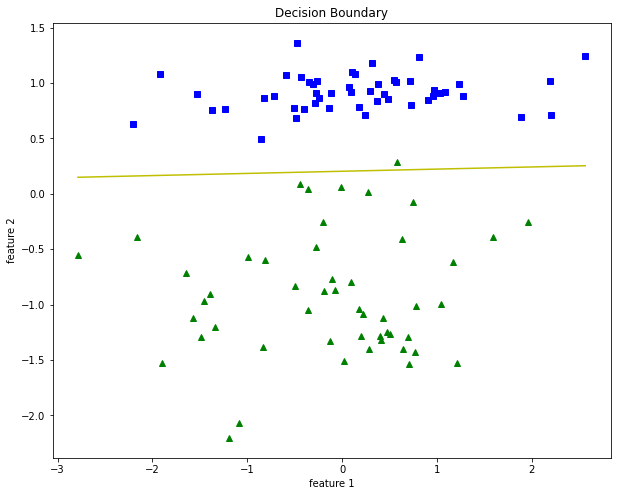

In [9]:
# Training for data generators
w, b, l = train(X, y, bs=10, epochs=1000, lr=0.01)
# Plotting Decision Boundary
plot_decision_boundary(X,y, w, b)

### Let's try it on apples and oranges dataset

In [10]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('apples_and_oranges.csv')
training_set,test_set = train_test_split(data,test_size=0.2,random_state=1)


In [11]:
x_train = training_set.iloc[:,0:2].values  # data
y_train = training_set.iloc[:,2].values  # target
x_test = test_set.iloc[:,0:2].values  # data
y_test = test_set.iloc[:,2].values  # target

In [12]:
x_train.shape

(32, 2)

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

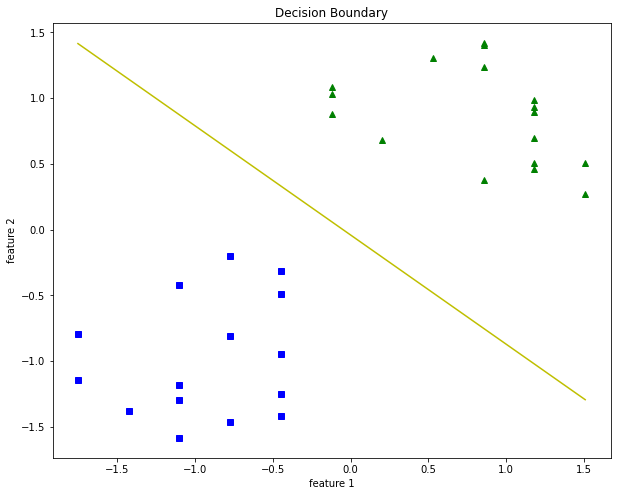

In [14]:
# Training 
w, b, l = train(x_train, y_train, bs=10000, epochs=5000, lr=0.01)

# Plotting Decision Boundary
plot_decision_boundary(x_train, y_train, w, b)

In [15]:
from sklearn.metrics import accuracy_score

y_pred = predict(x_test)

score = accuracy_score(y_test, y_pred)
score

0.875

Compare it with Logistic Regression model from Sklearn

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [17]:
lr.fit(x_train,y_train)

LogisticRegression()

In [18]:
y_pred1 = lr.predict(x_test)
score1 = accuracy_score(y_test, y_pred1)
score1

0.875